# Ironman

In this script we analyse the Ironman data set with simple statistical measures. We implement the statustical measures ourselves to get a better understanding of how they work.

We load the data and the necessary libraries:

In [6]:
# libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# data
data = np.loadtxt("data/ironman.txt")
# define columns
age = 2010 - data[:, 1]
tot_time = data[:,2]
tot_rank = data[:,0]
swim_time = data[:, 3]
cyc_time = data[:, 5]
run_time = data[:, 7]

Next, we define the functions for the:
* mean
* variance
* standard deviation
* uncertainty on the mean
* plotting of a histogram
* covariance
* correlation coefficient

In [7]:
def mean(x):
    """Calculate the mean for an array-like object x.

    Parameters
    ----------
    x : array-like
        Array-like object containing the data.

    Returns
    -------
    mean : float
        The mean of the data.
    """
    # here goes your code
    summed = 0
    for i in range(len(x)):
        summed += x[i]

    return summed / len(x)


def variance(x):

    """Calculate the variance for an array-like object x."""
    mean_x = mean(x)
    varsum = 0
    for i in range(len(x)):
        varsum += (x[i] - mean_x) ** 2

    return varsum / len(x)


def std(x):
    """Calculate the standard deviation for an array-like object x."""

    return (variance(x)) ** 0.5  # replace this with your code


def mean_uncertainty(x):
    """Calculate the uncertainty in the mean for an array-like object x."""

    return std(x) / len(x) ** 0.5


def histogram(x, bins, title):
    """X is an array like object and bins are the asked number of bins"""

    bins = bins + 1                                              # number of bins + 1 because one is lost in process
    x_bins = np.arange(min(x), max(x), (max(x)-min(x)) / bins)   # bin edges for x
    x_binned = []
    x_freq = []
    x_unit = []

    for i in range(len(x_bins) - 1):

       x_binned.append(x[np.logical_and(x_bins[i] <= x, x_bins[i+1] > x)])
       x_freq.append(len(x_binned[i]))
       x_unit.append(str(round(x_bins[i],1)) + "-" + str(round(x_bins[i+1],1)))

    # x_binned = np.array(x_binned)
    x_freq = np.array(x_freq)

    sta_uncertainty = len(x) ** 0.5

    # histograms of
    plt.figure()
    plt.rcParams.update({'font.size': 7})
    title_ = "Histogram of " + str(title)
    plt.title(title_)
    plt.ylabel("Frequency")
    plt.xticks(rotation = 45)
    plt.bar(x = x_unit, height = x_freq, yerr = sta_uncertainty)

    return ()

def covariance(x1,x2):
    '''covariance of to random variables'''
    covsum = 0
    mean_x1 = mean(x1)
    mean_x2 = mean(x2)
    for i in range(len(x1)):
        covsum += (x1[i] - mean_x1) * (x2[i] - mean_x2)

    return (covsum / len(x1))        # sample formula: len(x1) - 1

def correlation_coefficient(x1, x2):
    '''pearson correlation coefficient of two random variables'''

    return covariance(x1, x2) / (std(x1) * std(x2))

Let's Calculate the mean, uncertainty of the mean, variance, and standard deviation of the
* age distribution
* total time distribution

directly from the data.

In [9]:
print("AGE DISTRIBUTION")
mean_age = mean(age)
mean_age_uncertainty = mean_uncertainty(age)
# .2f means that the number is printed with two decimals. Check if that makes sense
print(f"The mean age of the participants is {mean_age:.2f} +/- {mean_age_uncertainty:.2f} years.")
var_age = variance(age)
std_age = std(age)
print(f"The variance of age of the participants is {var_age:.2f} and the standard deviation {std_age:.2f} years.")

print("\nTOTAL TIME DISTRIBUTION")
mean_tt = mean(tot_time)
mean_tt_uncertainty = mean_uncertainty(tot_time)
# .2f means that the number is printed with two decimals. Check if that makes sense
print(f"The mean total time of the participants is {mean_tt:.2f} +/- {mean_tt_uncertainty:.2f} minutes.")
var_tt = variance(tot_time)
std_tt = std(tot_time)
print(f"The variance of total time of the participants is {var_tt:.2f} and the standard deviation {std_tt:.2f} minutes.")

AGE DISTRIBUTION
The mean age of the participants is 39.33 +/- 0.18 years.
The variance of age of the participants is 63.04 and the standard deviation 7.94 years.

TOTAL TIME DISTRIBUTION
The mean total time of the participants is 697.15 +/- 2.04 minutes.
The variance of total time of the participants is 7826.68 and the standard deviation 88.47 minutes.


Let's compute the average of the total time for people younger and older than 35 years. We calculate the uncertainty on these two times. Can we conclude that one group is faster than the other?

In [11]:
data_copy = np.copy(data)
data_copy[:,1] = 2010 - data_copy[:,1]

young = data_copy[data_copy[:,1] < 35][:,2]
old = data_copy[data_copy[:,1] > 35][:,2]
mean_young = mean(young)
mean_young_uncertainty = mean_uncertainty(young)
mean_old = mean(old)
mean_old_uncertainty = mean_uncertainty(old)
print(f"The mean total time of the young participants is {mean_young:.2f} +/- {mean_young_uncertainty:.2f} \n"
      f"The mean total time of the old participants is {mean_old:.2f} +/- {mean_old_uncertainty:.2f}")
print("\nYes, one can conclude that the younger ones were faster because the upper uncertainty bound of \n"
      f"the younger peoble (= {mean_young + mean_young_uncertainty:.2f}) doesn't lie within the uncertainty "
      f"interval of the old ones (check above) ")

The mean total time of the young participants is 679.22 +/- 3.64 
The mean total time of the old participants is 705.16 +/- 2.52

Yes, one can conclude that the younger ones were faster because the upper uncertainty bound of 
the younger peoble (= 682.86) doesn't lie within the uncertainty interval of the old ones (check above) 


Let's histogram and plot the age and total time distributions with error bars according to the statistical uncertainty in each bin.

()

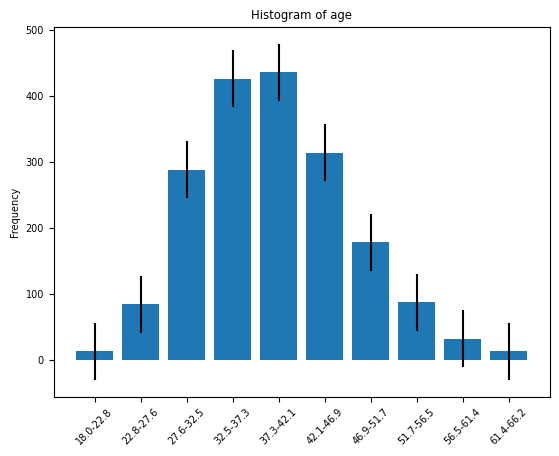

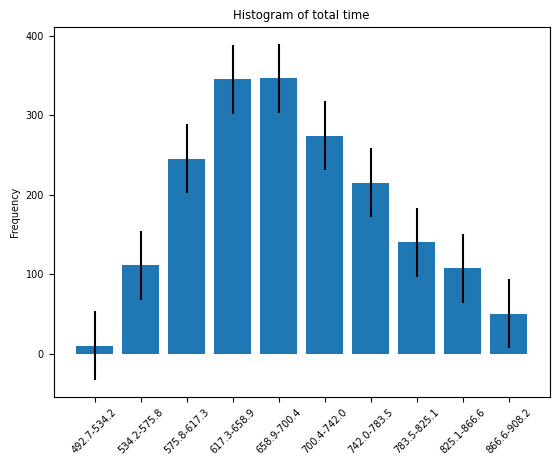

In [12]:
histogram(x = age, bins = 10, title = "age")
histogram(x = tot_time, bins = 10, title = "total time")

Now, we calculate the mean, variance and standard deviation of the distribution from the histograms of the age and total time. Let's compare the results with those we got in the first part. Let's use different bin widths and comment on what we observe.

In [38]:
binwidths_tt = [5, 10, 15, 20, 30, 50]
binwidths_age = [2, 3, 4, 5, 6, 7]
means_tt = np.zeros((4, 6))
means_tt[0, :] = binwidths_tt
means_age = np.zeros((4, 6))
means_age[0, :] = binwidths_age

for bw1,bw2 in zip(enumerate(binwidths_tt), enumerate(binwidths_age)):
    i, j , bw_tt, bw_age = bw1[0], bw2[0],  bw1[1], bw2[1]

    hist_tt = np.histogram(a=tot_time, bins=int((max(tot_time) - min(tot_time)) / bw_tt), range = (min(tot_time), max(tot_time)))[1]
    hist_age = np.histogram(a=age, bins=int((max(age) - min(age)) / bw_age), range = (min(age), max(age)))[1]
    hist_age = list(hist_age)
    hist_tt = list(hist_tt)

    if i != 0:
      tt = [tot_time[int(hist_tt[i - 1]):int(hist_tt[i])]]
    else: tt = [tot_time[:int(hist_tt[i])]]
    means_tt[1:, i] = np.array([mean(mean(tt)), mean(variance(tt)), mean(std(tt))])

    if j != 0:
      a = [age[int(hist_age[j - 1]): int(hist_age[j])]]
    else: a = [age[:int(hist_age[j])]]
    means_age[1:, j] = [mean(mean(a)), mean(variance(a)), mean(std(a))]

# print(pd.DataFrame(means_tt[1:, :], columns = means_tt[0, :], index = ["mean", "variance", "std"]))
# todo needs some debuggin here

print("Conclusion: The higher the binwidth is set, the higher the variance and standard deviation become, which means " \
      "that the mean precision is higher at lower binwidths")

Conclusion: The higher the binwidth is set, the higher the variance and standard deviation become, which means that the mean precision is higher at lower binwidths


We calculate the covariance and correlation coefficient between
* the total rank and the total time
* the age (in 2010) and the total time
* the total time and the swimming time
* the cycling time and the running time

Let's take a look at the scatter plots from the EDA of ironman and compare the results with the results we got.



In [39]:
# total rank and total time
cov1 = covariance(tot_rank, tot_time)
cor1 = correlation_coefficient(tot_rank, tot_time)
print(("The total rank and the total time have a covariance of {:.2f} with a correlation coefficient of {:.2f}.") \
      .format(cov1, cor1))
# print(np.cov(tot_time, tot_rank))

# age and total time
cov2 = covariance(age, tot_time)
cor2 = correlation_coefficient(age, tot_time)
print(("The age in 2010 and the total time have a covariance of {:.2f} with a correlation coefficient of {:.2f}.") \
    .format(cov2, cor2))

# total time and swimming and time
cov3 = covariance(tot_time, swim_time)
cor3 = correlation_coefficient(tot_time, swim_time)
print(("The total time and the swimming time have a covariance of {:.2f} with a correlation coefficient of {:.2f}.") \
      .format(cov3, cor3))

# cycling time and running time
cov4 = covariance(cyc_time, run_time)
cor4 = correlation_coefficient(cyc_time, run_time)
print(("The cycling time and the runnning time have a covariance of {:.2f} with a correlation coefficient of {:.2f}.") \
      .format(cov4, cor4))

print("Conclusion: The impression from the scatter plots coincides with the calculated values above. The total time \n"
      "leads directly to the total rank, thus we see high correlation and covariance and low scatter. From eye also the \n"
      "extent of scatter of the other plots coincides with the related correlation values of this weeks exercise.")

The total rank and the total time have a covariance of 46828.21 with a correlation coefficient of 0.98.
The age in 2010 and the total time have a covariance of 186.09 with a correlation coefficient of 0.26.
The total time and the swimming time have a covariance of 760.19 with a correlation coefficient of 0.68.
The cycling time and the runnning time have a covariance of 1370.72 with a correlation coefficient of 0.69.
Conclusion: The impression from the scatter plots coincides with the calculated values above. The total time 
leads directly to the total rank, thus we see high correlation and covariance and low scatter. From eye also the 
extent of scatter of the other plots coincides with the related correlation values of this weeks exercise.


We convert the total time from minutes to seconds and calculate the covariance and correlation coefficient between the age and the total time again. Which of the two changes and which stays the same?

In [40]:
# the total time in seconds
tot_time_sec = tot_time * 60

# age and total time in seconds
cov5 = covariance(age, tot_time_sec)
cor5 = correlation_coefficient(age, tot_time_sec)
print(("The age in 2010 and the total time in seconds have a covariance of {:.2f} with a correlation coefficient of {:.2f} \n" \
      "compared to {:.2f} and {:.2f} when time was measured in minutes.Fortunately, the normalization did its job and the \n" \
       "correlation coefficient stays the same whereas the covariance changes").format(cov5, cor5, cov2, cor2))

The age in 2010 and the total time in seconds have a covariance of 11165.20 with a correlation coefficient of 0.26 
compared to 186.09 and 0.26 when time was measured in minutes.Fortunately, the normalization did its job and the 
correlation coefficient stays the same whereas the covariance changes


# Weighted average

We have been hired as a medical physicist, and our first task is to report on the level of radiation in the room where the containers of some radioactive sources, used for radiotherapy
research, are stored. We measure the data stored in *radiation.txt* which can be found on the webpage. The measurements are taken with different dosimeters, and under different conditions, and thus have different uncertainties (2nd column). We assume that all measurements are independent from each other. The level of radiation is measured in mSv/h, millisievert per hour.

First we define a function to compute the weighted average data subsets and load the data.

In [41]:
radiation = np.loadtxt("data/radiation.txt")

In [42]:
def weighted_avg(data, error):
    '''data and error are two arrays of the same dimension to calculate weighted mean'''

    numerator, denominator = 0, 0
    for dat, err in zip(data, error):
        numerator += dat / (err ** 2)
        denominator += 1 / (err ** 2)

    weighted_average = numerator / denominator
    uncertainty = 1 / denominator ** 0.5

    return np.array([weighted_average, uncertainty])

Now we calculate the average radiation level, in mSv per year, and the associated uncertainty using the weighted average.

In [44]:
measurements = radiation[:,0]
uncertainties = radiation[:,1]

#a)
avg = weighted_avg(measurements, uncertainties)
print(("The weighted average is {:.3e} +/- {:.1e}").format(avg[0], avg[1]))

The weighted average is 2.957e-04 +/- 7.4e-06


Based on our result, we argue and explain whether the level of radiation in that room is compatible with the natural background radiation, which has been measured to be 2.4 mSv/y. We can assume that the uncertainty on this value is negligibly small compared to the uncertainty on your measurements.

In [46]:

# conversion to mSv/y: 1 common year = 365 days = (365 days) * (24 hours/day) = 8760 hours
avg_y = avg * 8760
print(("No, the backgound radiation of 2.4 mSv/y doesn't lie within the uncertainty of my measured {:.2f} +/- {:.2f} mSv/y ") \
.format(avg_y[0], avg_y[1]))
print("Thus, the radiation containers have proved effect on the radiation level!")

No, the backgound radiation of 2.4 mSv/y doesn't lie within the uncertainty of my measured 2.59 +/- 0.06 mSv/y 
Thus, the radiation containers have proved effect on the radiation level!
